In [52]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#set the random seed as zero
np.random.seed(0)

In [53]:
#input data 
creditData=pd.read_csv('/Users/Mandy/Study/SpringBoard/Capstone 1/Data/Modified Dataset.csv', header=0)

In [54]:
#subset macro-economic data
limit_bal=creditData.iloc[:,1]
sex=creditData.iloc[:,2]
education=creditData.iloc[:,3]
marriage=creditData.iloc[:,4]
age=creditData.iloc[:,5]
pay_0=creditData.iloc[:,6]
pay_2=creditData.iloc[:,7]
pay_3=creditData.iloc[:,8]
pay_4=creditData.iloc[:,9]
pay_5=creditData.iloc[:,10]
pay_6=creditData.iloc[:,11]
bill_amt1=creditData.iloc[:,12]
bill_amt2=creditData.iloc[:,13]
bill_amt3=creditData.iloc[:,14]
bill_amt4=creditData.iloc[:,15]
bill_amt5=creditData.iloc[:,16]
bill_amt6=creditData.iloc[:,17]
pay_amt1=creditData.iloc[:,18]
pay_amt2=creditData.iloc[:,19]
pay_amt3=creditData.iloc[:,20]
pay_amt4=creditData.iloc[:,21]
pay_amt5=creditData.iloc[:,22]
pay_amt6=creditData.iloc[:,23]
interest_rate=creditData.iloc[:,24]
employed_persons=creditData.iloc[:,25]
cpi=creditData.iloc[:,26]
consumer_confidence=creditData.iloc[:,27]
default_next_month=creditData.iloc[:,28]


In [55]:
# randomly pick the monthly datas to each cells for economic datas

for index,rowValue in interest_rate.iteritems():
        interest_rate[index]=random.choice([1.88,2,2.13])

for index,rowValue in employed_persons.iteritems():
        employed_persons[index]=random.choice([9916,9929,9931,9933,9949,9969])
        
for index,rowValue in cpi.iteritems():
        cpi[index]=random.choice([92.02,92.53,92.82,93.9,94.6,94.73])

for index,rowValue in consumer_confidence.iteritems():
        consumer_confidence[index]=random.choice([73.15,73.06,74.79,73.15,73.38,71.42])


In [56]:
#Data Exploration
default_next_month.value_counts()

0    23364
1     6636
Name: Default_Next_Month, dtype: int64

In [57]:
creditData.groupby('Default_Next_Month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence
Default_Next_Month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,1.666239,9937.950437,92.829781,72.830252
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.677517,9937.610307,92.824593,72.832278


In [58]:
creditData.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,1.666555,9937.784657,92.832436,72.828398,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,1.670163,9937.934629,92.826137,72.832211,0.207763


In [59]:
creditData.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,...,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,1.685185,9940.370370,92.888889,72.925926,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,1.667765,9937.861703,92.826268,72.825683,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,1.669444,9937.892821,92.829554,72.833438,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,...,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,1.671827,9937.157895,92.873065,72.891641,0.260062


In [60]:
creditData.groupby('Interest_Rate').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
Interest_Rate,,,,,,,,,,,,,,,,,,,,,
1,15016.026263,168948.480580,1.601127,1.841517,1.550614,35.383377,-0.029080,-0.142182,-0.179211,-0.232441,...,5837.277621,6038.397464,5257.458845,4742.185953,4806.071644,5394.869893,9937.704468,92.823606,72.824713,0.215335
2,14992.808843,166759.031004,1.605024,1.858887,1.552487,35.536088,-0.010567,-0.129598,-0.159755,-0.214834,...,5577.537135,5863.089971,5209.940136,4867.633436,4796.076613,5126.650384,9937.959775,92.831124,72.833666,0.224105


In [61]:
creditData.groupby('Employed_Persons').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,CPI,Consumer_Confidence,Default_Next_Month
Employed_Persons,,,,,,,,,,,,,,,,,,,,,
9916,15118.577545,166546.172060,1.605762,1.858721,1.555446,35.577545,-0.021113,-0.132991,-0.176598,-0.229676,...,5783.257893,5694.750395,5369.356551,4747.533741,4643.516772,5249.494278,1.664759,92.818074,72.838595,0.222573
9929,15111.538509,166700.831296,1.603097,1.863081,1.547270,35.414018,-0.018337,-0.110228,-0.146292,-0.207620,...,5723.711899,6718.685412,5323.120008,4802.648941,4979.476161,5160.445599,1.667685,92.840057,72.825183,0.224939
9931,14955.567509,168442.558231,1.595539,1.864982,1.551915,35.507896,-0.047177,-0.173510,-0.182590,-0.238452,...,5561.380379,5648.576589,5034.811094,5006.469206,4755.741019,5511.635610,1.662850,92.818792,72.819582,0.218121
9933,14852.422772,166853.257560,1.602801,1.836412,1.549219,35.416887,0.004262,-0.115486,-0.163385,-0.206008,...,5611.900548,6202.867059,5082.579460,4982.929775,4590.349503,5430.082606,1.670388,92.828699,72.837832,0.229957
9949,14865.969679,167176.066303,1.606226,1.850212,1.559127,35.461896,0.000809,-0.117647,-0.145341,-0.209218,...,5535.853851,5677.635335,5333.862745,4665.334748,5043.629472,5137.996766,1.672933,92.827977,72.832019,0.218112
9969,15094.782455,169132.572777,1.608969,1.845201,1.548190,35.529898,-0.017703,-0.151062,-0.181747,-0.231904,...,5762.437057,5612.534422,5212.004721,4751.637490,4789.328482,4807.147915,1.673879,92.838513,72.831039,0.213808


In [62]:
creditData.groupby('CPI').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,Consumer_Confidence,Default_Next_Month
CPI,,,,,,,,,,,,,,,,,,,,,
92,15006.500398,166342.429956,1.605630,1.854269,1.550126,35.481609,-0.009826,-0.127871,-0.164719,-0.221949,...,5620.278582,5973.789271,5139.461360,4690.049462,4739.606028,5184.375913,1.667109,9937.801819,72.832028,0.222148
93,15078.431333,168259.916285,1.601355,1.849113,1.554315,35.341638,-0.035280,-0.141917,-0.173410,-0.221846,...,5696.245764,5914.414590,5045.797289,4859.555711,4722.870839,5122.403030,1.668527,9937.809249,72.821009,0.220849
94,14951.980748,168825.723213,1.602056,1.853442,1.553271,35.564157,-0.017740,-0.138595,-0.164802,-0.218123,...,5712.802540,5844.680274,5447.546921,5015.662736,4928.841851,5309.838827,1.671303,9938.019958,72.833585,0.219938


In [63]:
creditData.groupby('Consumer_Confidence').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Default_Next_Month
Consumer_Confidence,,,,,,,,,,,,,,,,,,,,,
71,15077.149941,170788.225998,1.598380,1.874556,1.548992,35.812525,-0.026867,-0.160608,-0.176412,-0.208613,...,5832.376729,6004.563809,5200.526472,4486.652509,4674.117345,5388.339787,1.664955,9937.891940,92.833663,0.219676
73,14990.537878,166897.083396,1.606444,1.847384,1.550143,35.359624,-0.016639,-0.130046,-0.168501,-0.225808,...,5570.816016,5866.811994,5217.239431,4896.952697,4854.994772,5196.820087,1.668627,9937.877143,92.824360,0.221837
74,14962.873538,166484.836472,1.598414,1.854311,1.561546,35.653717,-0.006739,-0.121506,-0.146878,-0.212488,...,5859.996234,6051.796234,5284.209316,4887.173637,4705.814866,5115.750050,1.672944,9937.850743,92.840436,0.220218


In [64]:
creditData['x_bin']=pd.cut(x=creditData.AGE, bins=[20,30,40,50,60,70]) 

Text(0,0.5,'Frequency')

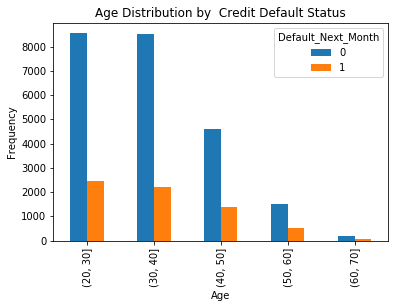

In [65]:
%matplotlib inline
#bar chart of age grouped by default
pd.crosstab(creditData.x_bin,default_next_month).plot(kind='bar')
plt.title('Age Distribution by  Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [66]:
#Separate the dataset into dependent and independent variables
X=creditData.drop('Default_Next_Month',axis=1)
X=X.drop('ID',axis=1)
X=X.drop('x_bin',axis=1) 
y=creditData['Default_Next_Month']

#then seperate it into training set, validation set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15)
 

In [67]:
#######MODEL ONE: LOGISTIC REGRESSION MODEL######
LR_classifier = LogisticRegression()

The 10 fold cross validation score based on Logistic Regression Model is: 0.778(+-0.000)
The average value of the histogram is 0.777 
The Default Probability based on Logistic Regression Model is : 0.564
The accuracy of Logistic Regression Model on test set is :  0.784


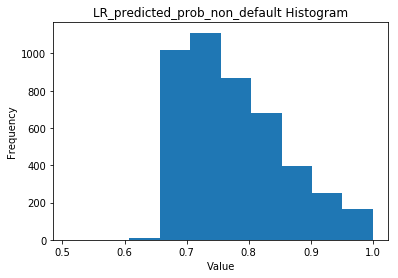

In [80]:
#10-fold cross-validation,if the evaluation score suggests not overfitting, predict the default status for each sample in test set
LR_cross_val_scores = cross_val_score(LR_classifier,X_train,y_train,scoring='accuracy',cv=10)
print("The 10 fold cross validation score based on Logistic Regression Model is: %0.3f(+-%0.3f)"%(LR_cross_val_scores.mean(),LR_cross_val_scores.std()*2))

if LR_cross_val_scores.mean() >0.97:
    print (" The Logistic Regression Model is overfitting in this case.")
else:
    LR_classifier.fit(X_train,y_train)   
    #generate default probabilities based on test set, take the mean of the nonDefault prob as threshold, if the prob is lower than the mean,it will still be considered as default case
    LR_predicted_prob_nondefault=LR_classifier.predict_proba(X_test)[:,0]
    print("The average value of the histogram is %0.3f "%LR_predicted_prob_nondefault.mean())
    plt.hist(LR_predicted_prob_nondefault)
    plt.title("LR_predicted_prob_non_default Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    LR_prob_default=1-sum(item > LR_predicted_prob_nondefault.mean() for item in LR_predicted_prob_nondefault) /len(LR_predicted_prob_nondefault)
    print("The Default Probability based on Logistic Regression Model is :",'%.3f'%LR_prob_default)
    LR_accuracy=LR_classifier.score(X_test,y_test)
    print("The accuracy of Logistic Regression Model on test set is : ",'%.3f'%LR_accuracy)

In [ ]:
#create a dataframe to store evaluation info of different models
evaluation = pd.DataFrame({'Model':['Logistic Regression'],'Default_Probability':[LR_prob_default],'Cross_Validation_Accuracy':[LR_cross_val_scores.mean()],'Test_Accuracy':[LR_accuracy]})
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

In [ ]:
#########MODEL TWO: RANDOM FOREST MODEL#########
RF_classifier = RandomForestClassifier(random_state=0)

In [ ]:
# 10 Fold Cross Validation over the entire training set
RF_cross_val_scores=cross_val_score(RF_classifier,X_train,y_train,cv=10,scoring='accuracy')
print("The 10 fold cross validation score based on Random Forest Model is: %0.3f(+/-%0.3f)"%(RF_cross_val_scores.mean(),RF_cross_val_scores.std()*2))

# if the score is less than 0.975, then build the classifier with the entire training set
if RF_cross_val_scores.mean() >0.97:
    print (" The Random Forest Model is overfitting in this case.")
else:
    RF_classifier.fit(X_train,y_train)
    RF_predicted=RF_classifier.predict(X_test)
    RF_prob_default=np.sum(RF_predicted)/len(RF_predicted)
    print("The Default Probability based on Random Forest Model is :",'%.3f'%RF_prob_default)
    RF_accuracy=RF_classifier.score(X_test,y_test)
    print("The accuracy of Random Forest Model on test set is : ",'%.3f'%RF_accuracy)
    print(metrics.confusion_matrix(y_test,RF_predicted))
    print(metrics.classification_report(y_test,RF_predicted))

In [ ]:
features_weight=RF_classifier.fit(X_test,y_test).feature_importances_
feature_index = np.where(features_weight==max(features_weight))
feature_index=int(feature_index[0][0])
print("The most important feature is:",(list(X_test)[feature_index]))

In [ ]:
#output the result into the existing evaluation dataframe to compare with other model
new_evaluation=pd.DataFrame({'Model':["Random Forest"],'Default_Probability':[RF_prob_default],'Cross_Validation_Accuracy':[RF_cross_val_scores.mean()],'Test_Accuracy':[RF_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

In [ ]:
########MODEL THREE: NAIVE BAYES -Non Scaled #######################
NB_classifier=GaussianNB()
#10-fold cross validation for the entire standardized training data without scaling/normalization/standarization
NB_NonScaled_cross_val_scores=cross_val_score(NB_classifier,X_train,y_train,cv=10,n_jobs=-1,scoring='accuracy')
print("The 10 fold cross validation score based on Naive Bayes Model(Non Scaled) is: %0.3f(+/-%0.3f)"%(NB_NonScaled_cross_val_scores.mean(),NB_NonScaled_cross_val_scores.std()*2))

In [ ]:
if NB_NonScaled_cross_val_scores.mean() >0.97:
    print ("The Naive Bayes Model (Non Scaled) is overfitting in this case.")
else:
    NB_classifier.fit(X_train,y_train)
    NB_NonScaled_predicted=NB_classifier.predict(X_test)
    NB_NonScaled_prob_default=np.sum(NB_NonScaled_predicted)/len(NB_NonScaled_predicted)
    print("The Default Probability based on Naive Bayes Model(Non Scaled) is :",'%.3f'%NB_NonScaled_prob_default)
    NB_NonScaled_accuracy=NB_classifier.score(X_test,y_test)
    print("The accuracy of Naive Bayes Model(Non Scaled) on test set is : ",'%.3f'%NB_NonScaled_accuracy)

In [ ]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Naive Bayes_NonScaled"],'Default_Probability':[NB_NonScaled_prob_default],'Cross_Validation_Accuracy':[NB_NonScaled_cross_val_scores.mean()],'Test_Accuracy':[NB_NonScaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

In [ ]:
###################MODEL FOUR: NAIVE BAYES ( SCALED) ############################
#Standardization
scaler=StandardScaler()
NB_classifier_scaled=GaussianNB()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [ ]:
#10-fold cross validation for the entire standardized training set
NB_Scaled_cross_val_scores=cross_val_score(NB_classifier_scaled,X_train_scaled,y_train,cv=10,n_jobs=-1,scoring='accuracy')
print("The 10 fold cross validation score based on Naive Bayes Model(Scaled) is: %0.3f(+/-%0.3f)" %(NB_Scaled_cross_val_scores.mean(),NB_Scaled_cross_val_scores.std()*2))

In [ ]:
if NB_Scaled_cross_val_scores.mean() >0.97:
    print (" The Naive Bayes Model (scaled) is overfitting in this case.")
else:
    NB_classifier_scaled.fit(X_train_scaled,y_train)
    NB_Scaled_predicted=NB_classifier_scaled.predict(X_test_scaled)
    NB_Scaled_prob_default=np.sum(NB_Scaled_predicted)/len(NB_Scaled_predicted)
    print("The Default Probability based on Naive Bayes Model(Scaled) is :",'%.3f'%NB_Scaled_prob_default)
    NB_Scaled_accuracy=NB_classifier_scaled.score(X_test_scaled,y_test)
    print("The accuracy of Naive Bayes Model(Scaled) on test set is : ",'%.3f'%NB_Scaled_accuracy)

In [ ]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Naive Bayes_Scaled"],'Default_Probability':[NB_Scaled_prob_default],'Cross_Validation_Accuracy':[NB_Scaled_cross_val_scores.mean()],'Test_Accuracy':[NB_Scaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

In [ ]:
############### MODEL FIVE: VOTING CLASSIFIER WITH NON-SCALED DATA #############
#build a voting classifier based on different models' accuracies
VT_classifier_nonscaled=VotingClassifier(estimators=[('Logistic Regression',LR_classifier),('Random Forest',RF_classifier),('Naive Bayes',NB_classifier)],voting='soft',weights=[LR_accuracy,RF_accuracy,NB_NonScaled_accuracy])
# 10-fold cross validation
VT_NonScaled_cross_val_scores=cross_val_score(VT_classifier_nonscaled,X_train,y_train,cv=10,scoring='accuracy')
print("The 10 fold cross validation score based on Voting Classifier(Non-Scaled) is: %0.3f(+/-%0.3f)" %(VT_NonScaled_cross_val_scores.mean(),VT_NonScaled_cross_val_scores.std()*2))

In [ ]:
if VT_NonScaled_cross_val_scores.mean() >0.97:
    print ("The Voting Classifier (Non Scaled) is overfitting in this case.")
else:
    VT_classifier_nonscaled.fit(X_train,y_train)
    VT_NonScaled_predicted=VT_classifier_nonscaled.predict(X_test)
    VT_NonScaled_prob_default=np.sum(VT_NonScaled_predicted)/len(VT_NonScaled_predicted)
    print("The Default Probability based on Voting Classifier(Non Scaled) is :",'%.3f'%VT_NonScaled_prob_default)
    VT_NonScaled_accuracy=VT_classifier_nonscaled.score(X_test,y_test)
    print("The accuracy of Voting Classifier(Non Scaled) on test set is : ",'%.3f'%VT_NonScaled_accuracy)

In [ ]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Voting Classifier_NonScaled"],'Default_Probability':[VT_NonScaled_prob_default],'Cross_Validation_Accuracy':[VT_NonScaled_cross_val_scores.mean()],'Test_Accuracy':[VT_NonScaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

In [ ]:
################ MODEL SIX: VOTING CLASSIFIER WITH SCALED DATA ##############
#build a voting classifier based on different models' accuracies
VT_classifier_scaled=VotingClassifier(estimators=[('Logistic Regression',LR_classifier),('Random Forest',RF_classifier),('Naive Bayes',NB_classifier_scaled)],voting='soft',weights=[LR_accuracy,RF_accuracy,NB_Scaled_accuracy])
# 10-fold cross validation
VT_Scaled_cross_val_scores=cross_val_score(VT_classifier_scaled,X_train,y_train,cv=10,scoring='accuracy')
print("The 10 fold cross validation score based on Voting Classifier(Scaled) is: %0.3f(+/-%0.3f)" %(VT_Scaled_cross_val_scores.mean(),VT_Scaled_cross_val_scores.std()*2))

In [ ]:
if VT_Scaled_cross_val_scores.mean() >0.97:
    print ("The Voting Classifier (Scaled) is overfitting in this case.")
else:
    VT_classifier_scaled.fit(X_train_scaled,y_train)
    VT_Scaled_predicted=VT_classifier_scaled.predict(X_test_scaled)
    VT_Scaled_prob_default=np.sum(VT_Scaled_predicted)/len(VT_Scaled_predicted)
    print("The Default Probability based on Voting Classifier(Scaled) is :",'%.3f'%VT_Scaled_prob_default)
    VT_Scaled_accuracy=VT_classifier_scaled.score(X_test_scaled,y_test)
    print("The accuracy of Voting Classifier(Scaled) on test set is : ",'%.3f'%VT_Scaled_accuracy)

In [ ]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Voting Classifier_Scaled"],'Default_Probability':[VT_Scaled_prob_default],'Cross_Validation_Accuracy':[VT_Scaled_cross_val_scores.mean()],'Test_Accuracy':[VT_Scaled_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)